In [ ]:
from sklearn.manifold import MDS
from matplotlib import pyplot as plt
import sklearn.datasets as dt
import seaborn as sns         
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [ ]:
path="data/"

In [37]:
files=os.listdir(path)
max_d=0
min_d=99999
gps_dict={}
for f in files:
    df=pd.read_csv(path+f,index_col=None, header=None)
    # df = df.reset_index(level=0)
    gps=[]
    for index, row in df.iterrows(): 
        gps.append(row.to_list())
        dis= np.linalg.norm(row.to_list())
        if dis>max_d:
            max_d=dis
        if dis<min_d:
            min_d=dis
    
    gps_dict[f]=gps

splitting into m regions

In [ ]:
def green(p1,p2):
    return np.dot(np.array(p1),np.array(p2))

In [64]:
#calculate histogram for a given gps and m
def regions(GPS,m):
    m=m+1
    distances = [np.linalg.norm(v) for v in GPS]
    delta = (max_d-min_d) / m
    gps_reg=[[] for i in range(m)]
    for d in range(len(distances)):
        gps_reg[int((distances[d] - min_d-(0.01*distances[d])) // delta) ].append(GPS[d])

    hist=[]
    for i in range(m):
        h1=[];
        for j in range(i+1,m):
            for p1 in gps_reg[i]:
                for p2 in gps_reg[j]:
                    #print(p1,p2)
                    h1.append(green(p1,p2))

            hist.append(h1)

            # plt.hist(h1)
            # sns.distplot(h1, hist=False, label="test")
            # plt.show()
    return hist





/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

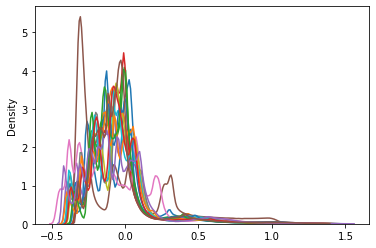

In [65]:
for f in files:
    h=regions(gps_dict[f],1)
    sns.distplot(h[0], hist=False, label="test")
plt.show()

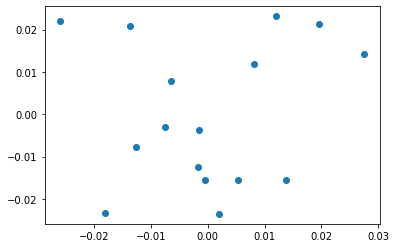

In [79]:

gps_mds=[np.mean(gps, axis=0) for gps in gps_dict.values()]
model = MDS(n_components=2, max_iter=300, random_state=32)
coords_2d = model.fit_transform(gps_mds)
plt.scatter(coords_2d[:,0],coords_2d[:,1])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


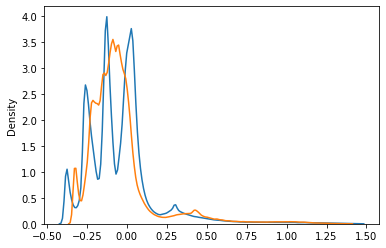

In [80]:
s=[]
for f in files[:2]:
    h=regions(gps_dict[f],1)
    s.append(sns.distplot(h[0], hist=False, label="test"))
plt.show()

In [82]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
 
neigh.fit(X, y)
KNeighborsClassifier(...)
print(neigh.predict([[1.1]]))
[0]

TypeError: ignored